In [4]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import netCDF4 as nc
import cmocean as cm

from xgcm import Grid

In [58]:
PFu0 = xr.open_dataset('PFuB0.nc')
PFum1 = xr.open_dataset('PFuB-1.nc')
PFup1 = xr.open_dataset('PFuB1.nc')


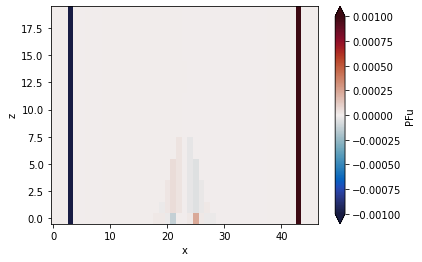

In [59]:
xr.open_dataset('PFu.nc').PFu.isel(y = 4).plot(vmax = 1e-3,vmin = -1e-3,cmap = cm.cm.balance)

In [60]:
PFu0

<xarray.Dataset>
Dimensions:  (z: 20, y: 8, x: 47)
Dimensions without coordinates: z, y, x
Data variables:
    PFu      (z, y, x) float64 ...

Text(0.5, 1.0, 'PFu, B = +1')

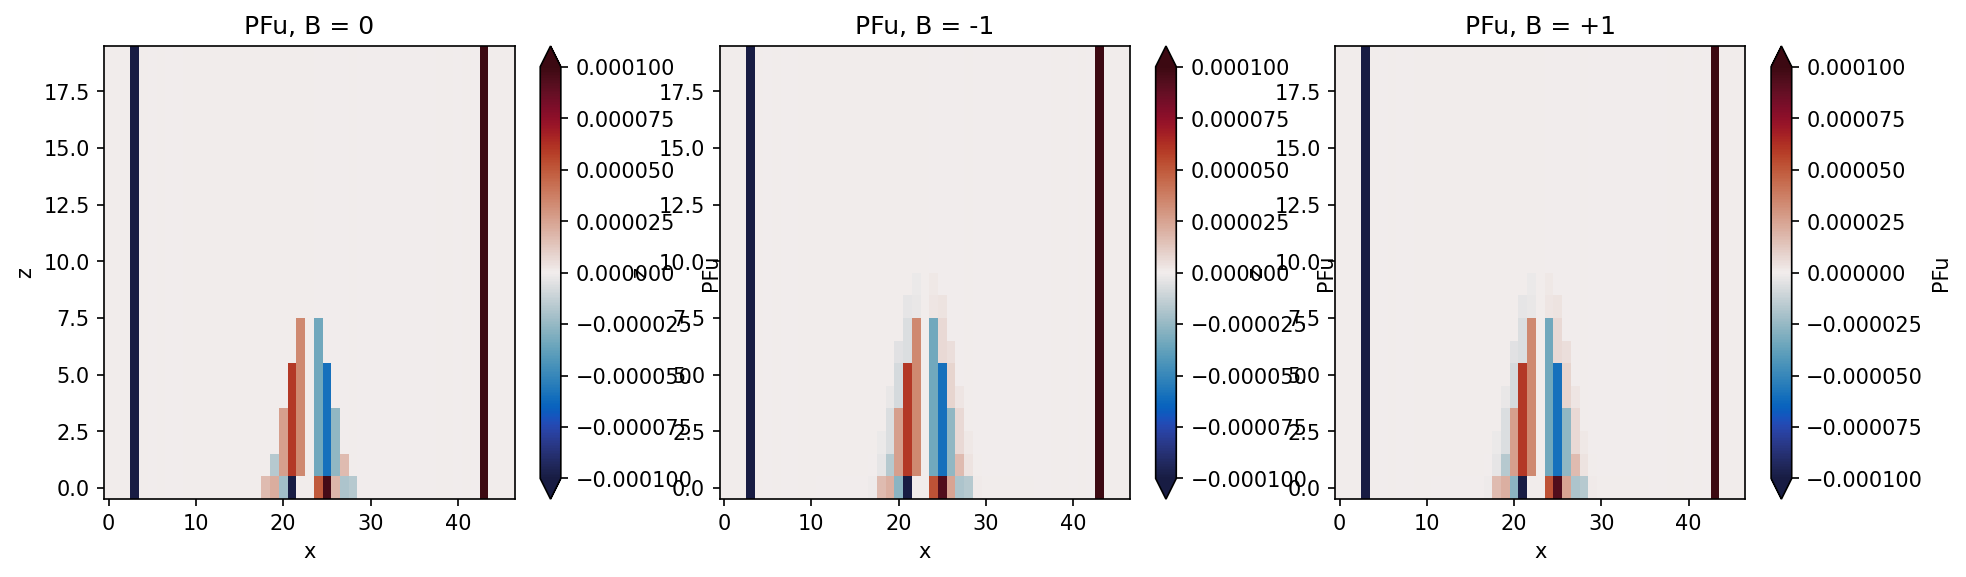

In [61]:
fig, axes = plt.subplots(ncols = 3, dpi = 150, figsize = (15,4))

PFu0.PFu.isel(y = 3).plot(ax = axes[0], vmin = -1e-4,vmax = 1e-4, cmap = cm.cm.balance)
axes[0].set_title('PFu, B = 0')
PFum1.PFu.isel(y = 3).plot(ax = axes[1], vmin = -1e-4,vmax = 1e-4, cmap = cm.cm.balance)
axes[1].set_title('PFu, B = -1')
PFup1.PFu.isel(y = 3).plot(ax = axes[2], vmin = -1e-4,vmax = 1e-4, cmap = cm.cm.balance)
axes[2].set_title('PFu, B = +1')


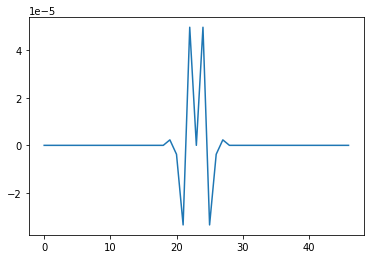

In [62]:
#check symmetry of 0 soln
#PFu0.PFu.isel(y = 3,z=0).plot()
plt.plot(PFu0.PFu.x.values,PFu0.PFu.isel(y = 3,z=0).values+np.flip(PFu0.PFu.isel(y = 3,z=0).values))
#plt.ylim()

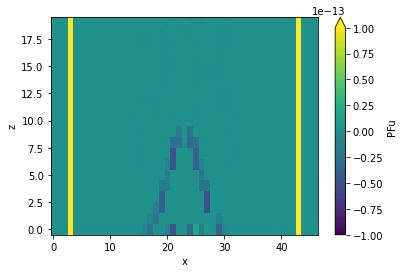

In [63]:
(PFum1.PFu-PFup1.PFu).isel(y = 3).plot(vmax = 1e-13,vmin=-1e-13)

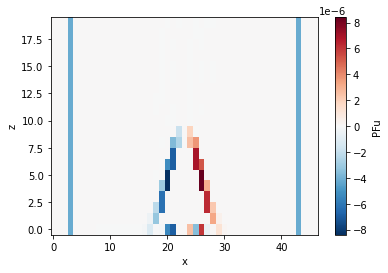

In [64]:
(PFup1.PFu-PFu0.PFu).isel(y = 3).plot()

Above is with pressure from max of left and right iterations (why B=+/- 1 are the same, I think)

here is left:

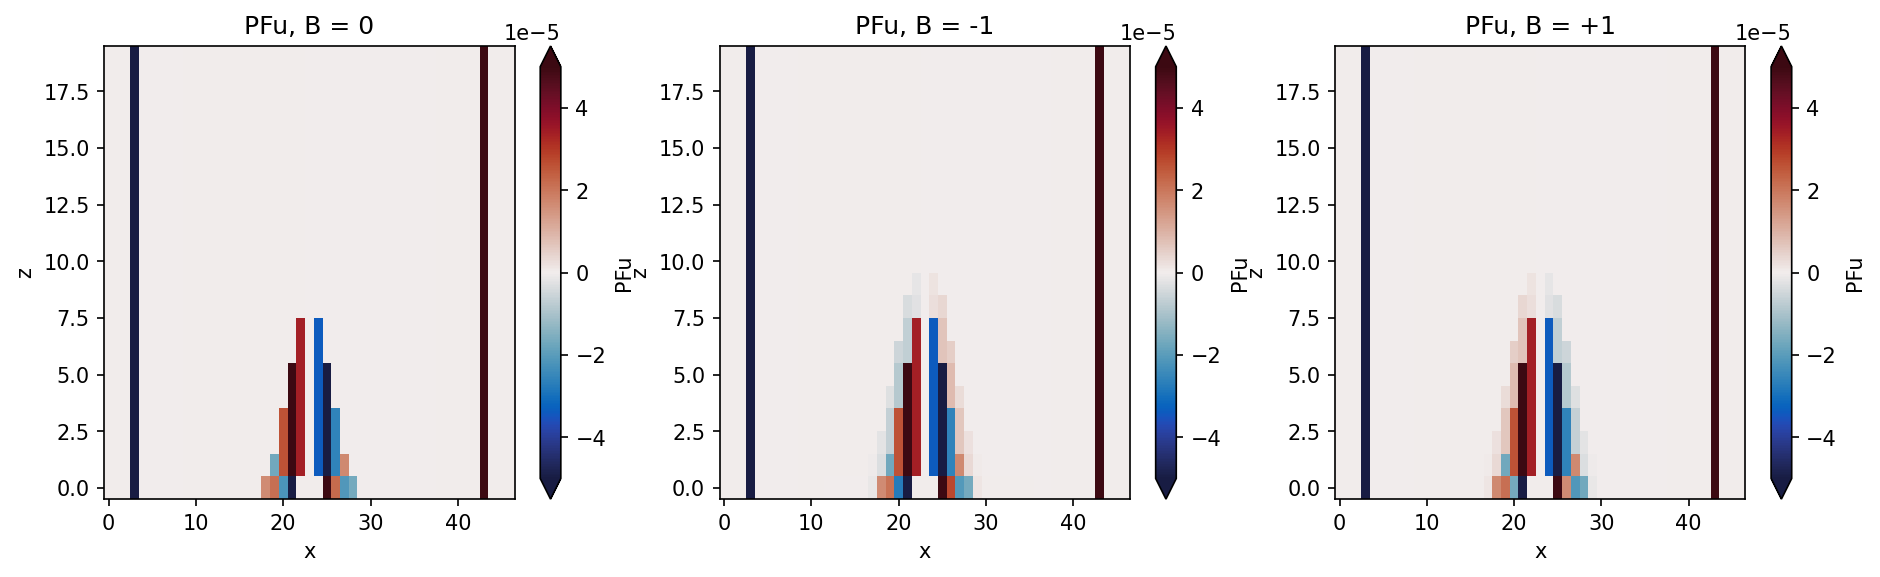

Text(0.5, 1.0, 'Asymmetry in PFu from B=0 version')

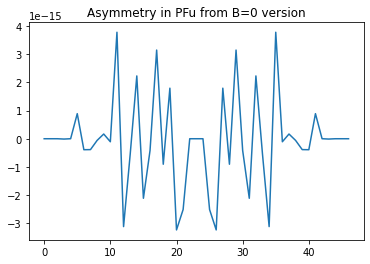

In [5]:
PFu0 = xr.open_dataset('PFuB0.nc')
PFum1 = xr.open_dataset('PFuB-1.nc')
PFup1 = xr.open_dataset('PFuB1.nc')
fig, axes = plt.subplots(ncols = 3, dpi = 150, figsize = (15,4))

PFu0.PFu.isel(y = 3).plot(ax = axes[0], vmin = -5e-5,vmax = 5e-5, cmap = cm.cm.balance)
axes[0].set_title('PFu, B = 0')
PFum1.PFu.isel(y = 3).plot(ax = axes[1], vmin = -5e-5,vmax = 5e-5, cmap = cm.cm.balance)
axes[1].set_title('PFu, B = -1')
PFup1.PFu.isel(y = 3).plot(ax = axes[2], vmin = -5e-5,vmax = 5e-5, cmap = cm.cm.balance)
axes[2].set_title('PFu, B = +1')

plt.show()

plt.plot(PFu0.PFu.x.values,PFu0.PFu.isel(y = 3,z=0).values+np.flip(PFu0.PFu.isel(y = 3,z=0).values))
plt.title('Asymmetry in PFu from B=0 version')



and right:

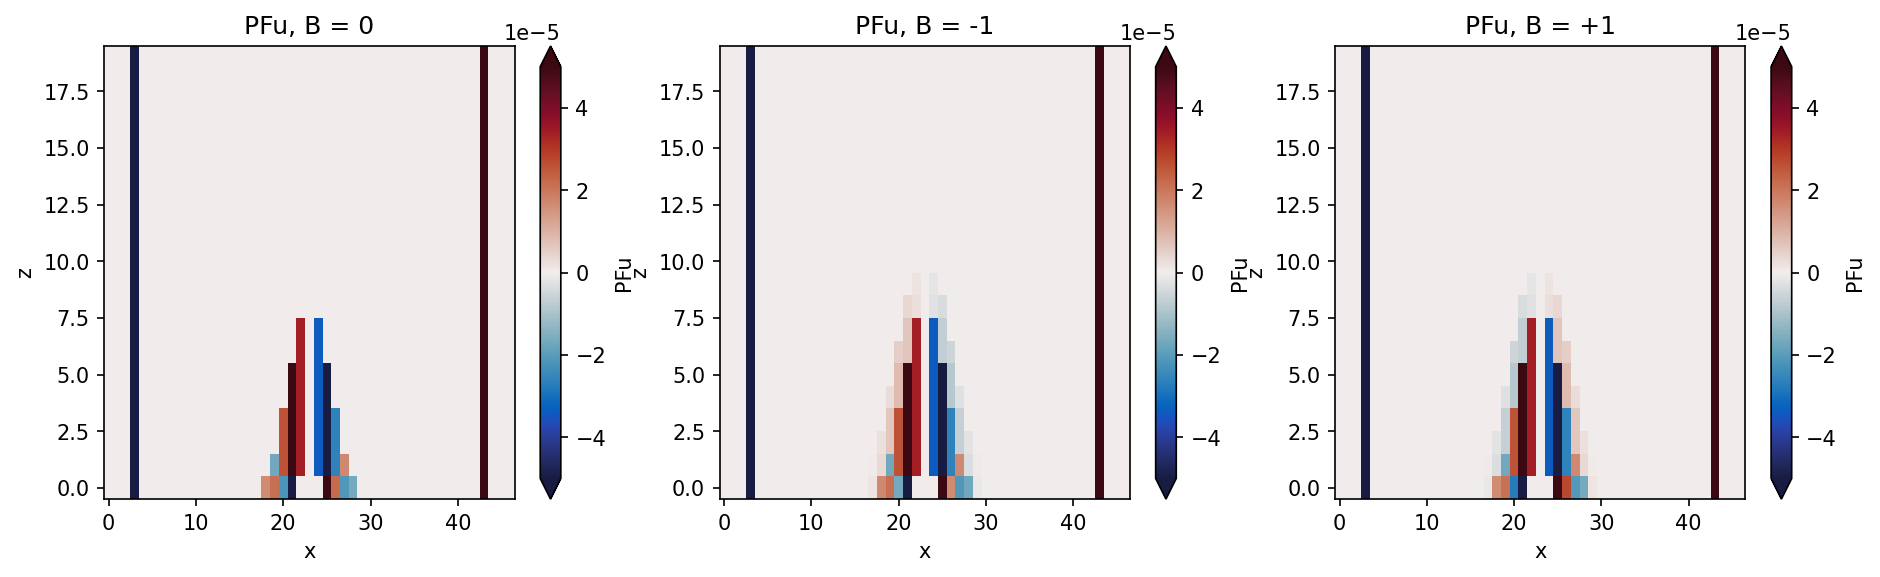

(-1e-12, 1e-12)

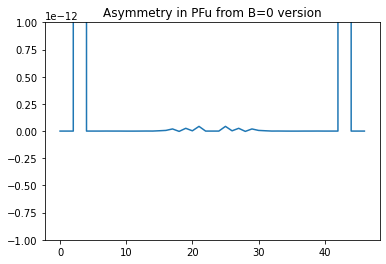

In [82]:
PFu0 = xr.open_dataset('PFuB0.nc')
PFum1 = xr.open_dataset('PFuB-1.nc')
PFup1 = xr.open_dataset('PFuB1.nc')
fig, axes = plt.subplots(ncols = 3, dpi = 150, figsize = (15,4))

PFu0.PFu.isel(y = 3).plot(ax = axes[0], vmin = -5e-5,vmax = 5e-5, cmap = cm.cm.balance)
axes[0].set_title('PFu, B = 0')
PFum1.PFu.isel(y = 3).plot(ax = axes[1], vmin = -5e-5,vmax = 5e-5, cmap = cm.cm.balance)
axes[1].set_title('PFu, B = -1')
PFup1.PFu.isel(y = 3).plot(ax = axes[2], vmin = -5e-5,vmax = 5e-5, cmap = cm.cm.balance)
axes[2].set_title('PFu, B = +1')

plt.show()

plt.plot(PFu0.PFu.x.values,PFu0.PFu.isel(y = 3,z=0).values+np.flip(PFu0.PFu.isel(y = 3,z=0).values))
plt.title('Asymmetry in PFu from B=0 version')
plt.ylim(-1e-12,1e-12)


BUT with this option u is asymmetric in the B=0 case

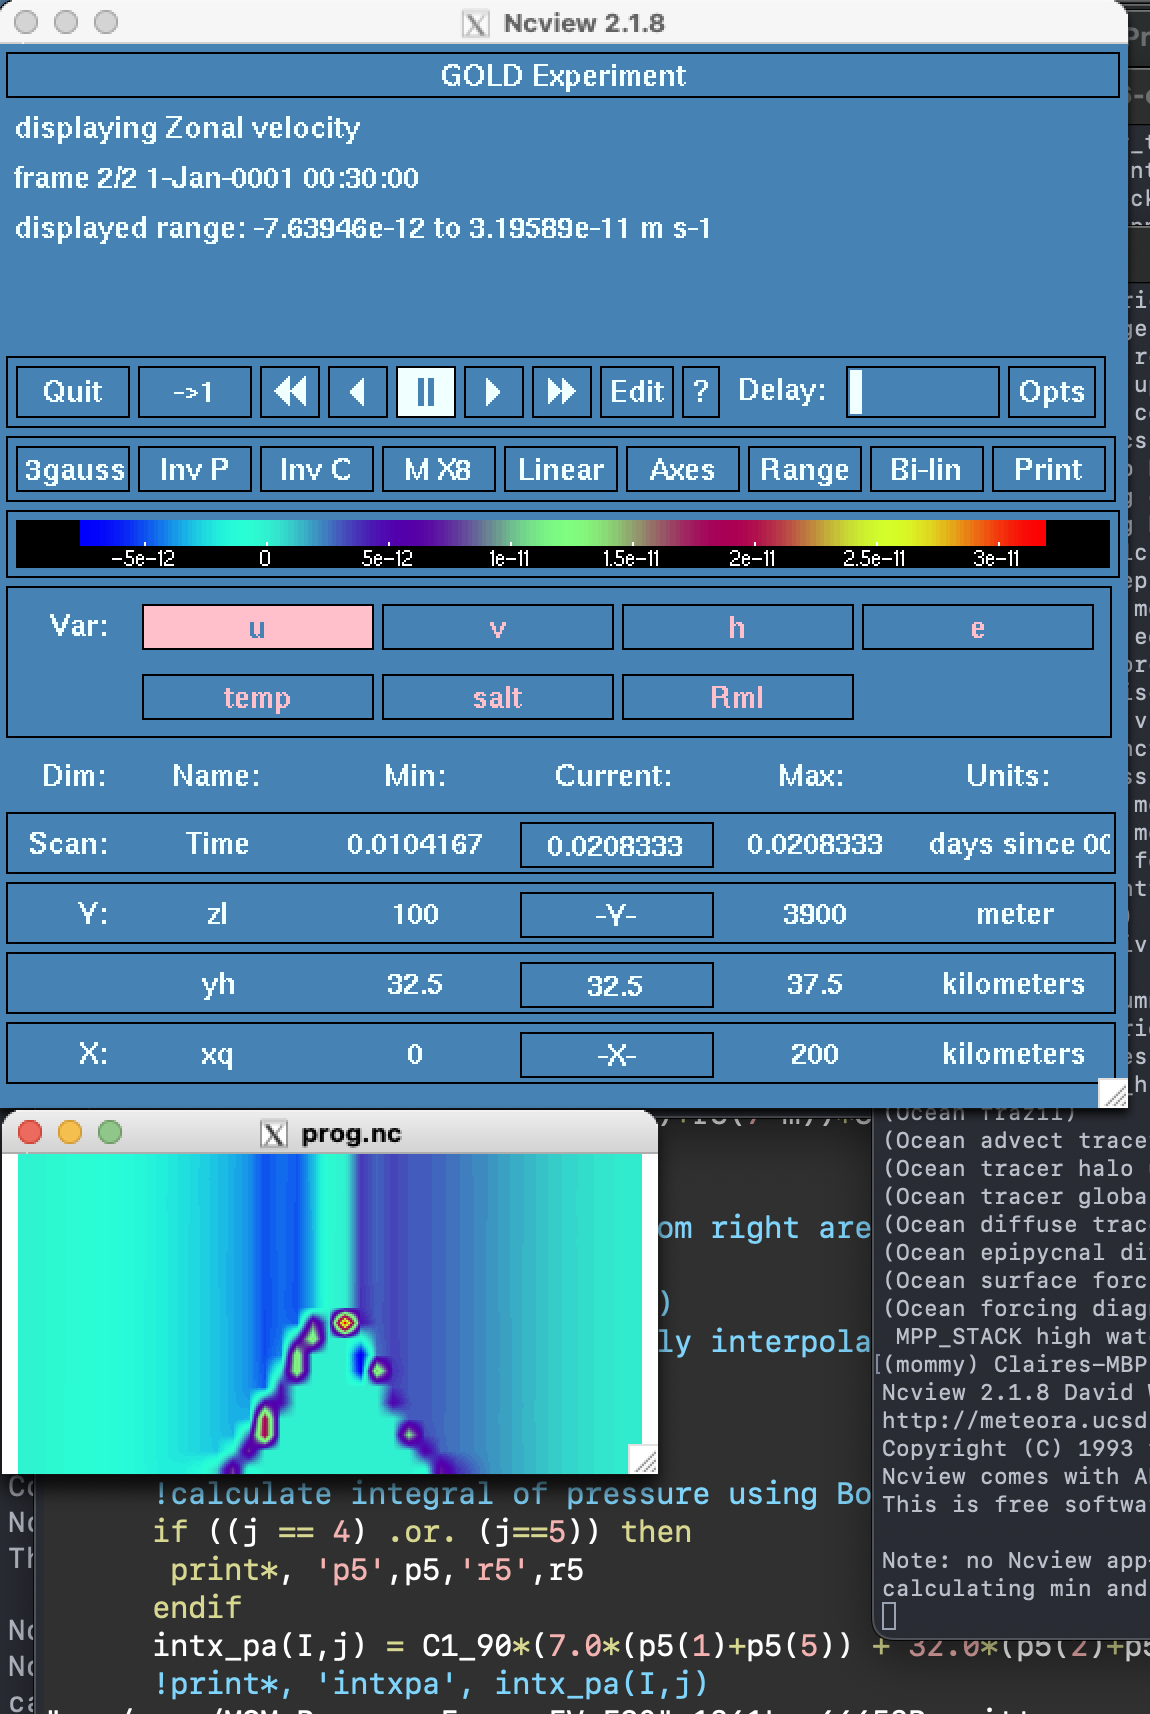

# update 18 apr: use nonhydrostatic + curvature correction to get pressures

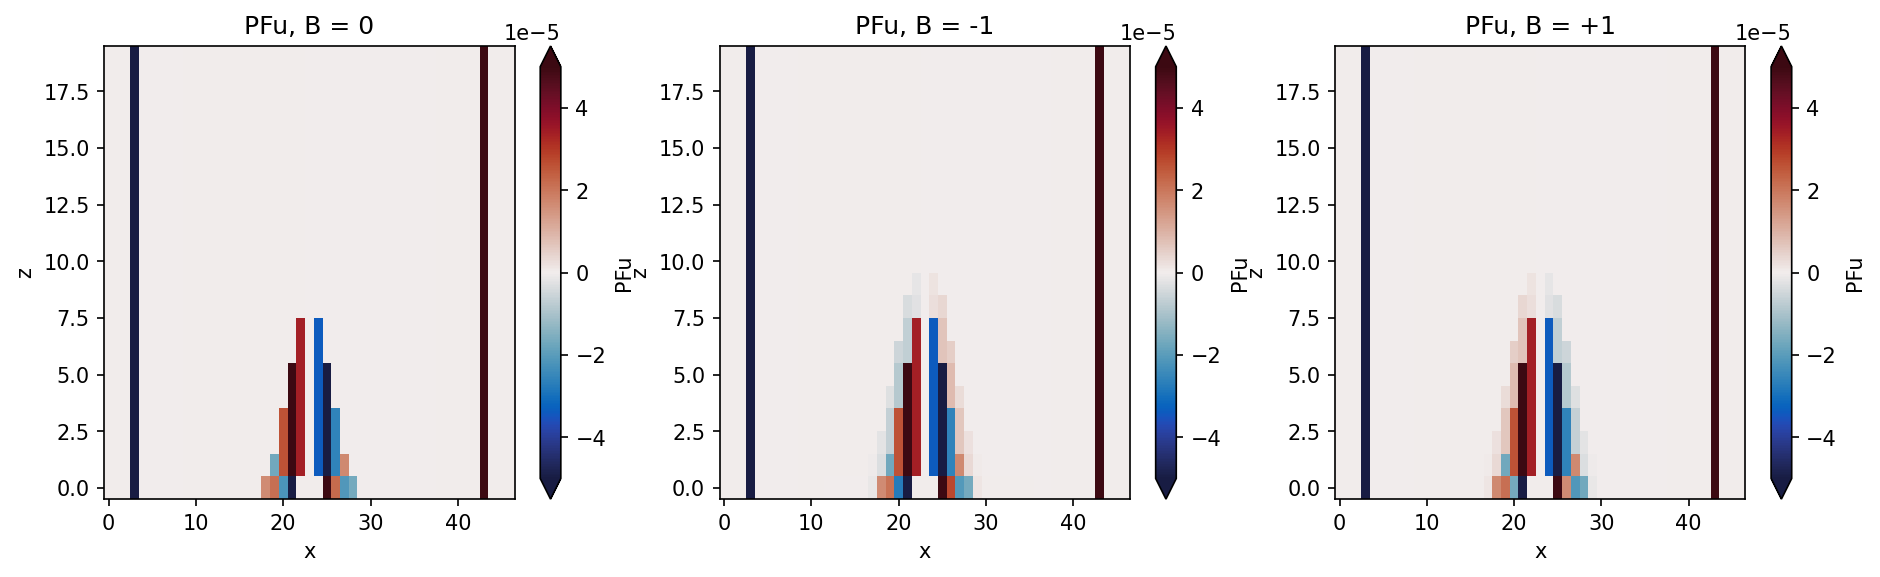

In [6]:
#at t=30mins

PFu0 = xr.open_dataset('PFuB0.nc')
PFum1 = xr.open_dataset('PFuB-1.nc')
PFup1 = xr.open_dataset('PFuB1.nc')
fig, axes = plt.subplots(ncols = 3, dpi = 150, figsize = (15,4))

PFu0.PFu.isel(y = 3).plot(ax = axes[0], vmin = -5e-5,vmax = 5e-5, cmap = cm.cm.balance)
axes[0].set_title('PFu, B = 0')
PFum1.PFu.isel(y = 3).plot(ax = axes[1], vmin = -5e-5,vmax = 5e-5, cmap = cm.cm.balance)
axes[1].set_title('PFu, B = -1')
PFup1.PFu.isel(y = 3).plot(ax = axes[2], vmin = -5e-5,vmax = 5e-5, cmap = cm.cm.balance)
axes[2].set_title('PFu, B = +1')

plt.show()

#plt.plot(PFu0.PFu.x.values,PFu0.PFu.isel(y = 3,z=0).values+np.flip(PFu0.PFu.isel(y = 3,z=0).values))
#plt.title('Asymmetry in PFu from B=0 version')



# for interior:


can straddle the "correct" answer for nonvanished cells

PFu for vanished cells is real?

Text(0.5, 1.0, 'PFu, B = +1')

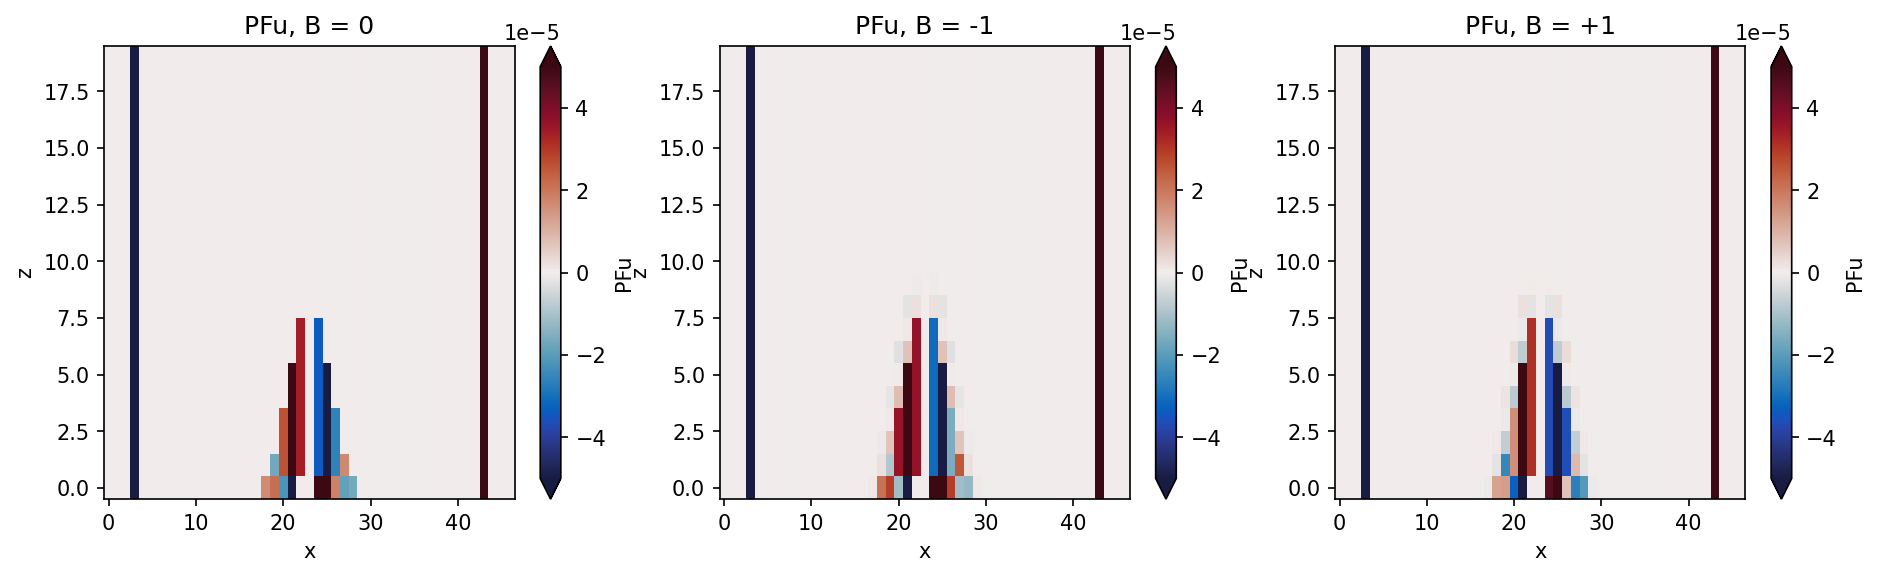

In [73]:
PFu0 = xr.open_dataset('PFuB0.nc')
PFum1 = xr.open_dataset('PFuB-1.nc')
PFup1 = xr.open_dataset('PFuB1.nc')
fig, axes = plt.subplots(ncols = 3, dpi = 150, figsize = (15,4))

PFu0.PFu.isel(y = 3).plot(ax = axes[0], vmin = -5e-5,vmax = 5e-5, cmap = cm.cm.balance)
axes[0].set_title('PFu, B = 0')
PFum1.PFu.isel(y = 3).plot(ax = axes[1], vmin = -5e-5,vmax = 5e-5, cmap = cm.cm.balance)
axes[1].set_title('PFu, B = -1')
PFup1.PFu.isel(y = 3).plot(ax = axes[2], vmin = -5e-5,vmax = 5e-5, cmap = cm.cm.balance)
axes[2].set_title('PFu, B = +1')


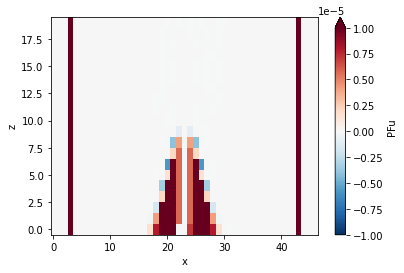

In [74]:
(PFum1.PFu-PFup1.PFu).isel(y = 3).plot(vmax = 1e-5,vmin=-1e-5,cmap = 'RdBu_r')

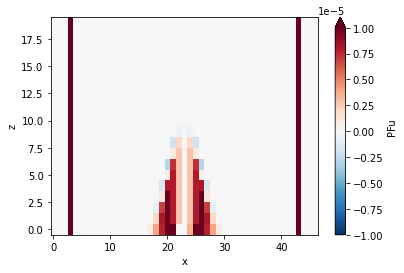

In [75]:
(PFum1.PFu-PFu0.PFu).isel(y = 3).plot(vmax = 1e-5,vmin=-1e-5,cmap = 'RdBu_r')

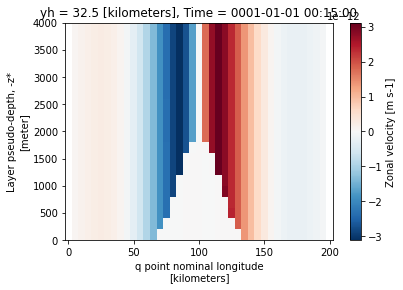

In [5]:
prog = xr.open_dataset('prog.nc')
prog.u.isel(yh = 0,Time = 0).plot(cmap = 'RdBu_r')

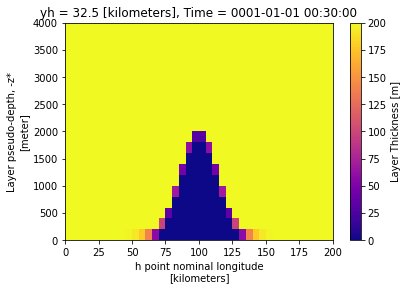

In [3]:
prog = xr.open_dataset('prog.nc')
prog.h.isel(yh = 0,Time = 1).plot(cmap = 'plasma')

/Users/claireyung/opt/anaconda3/lib/python3.9/site-packages/xarray/coding/times.py:699: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)


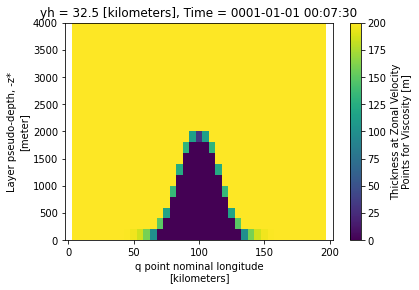

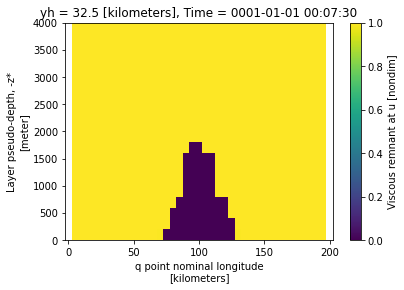

In [4]:
visc = xr.open_dataset('visc.nc')
visc.Hu_visc.isel(yh = 0,Time = 0).plot()#cmap = 'plasma')
plt.show()
visc.visc_rem_u.isel(yh = 0,Time = 0).plot()#

# For seamount

Text(0.5, 1.0, 'PFu, B = +1')

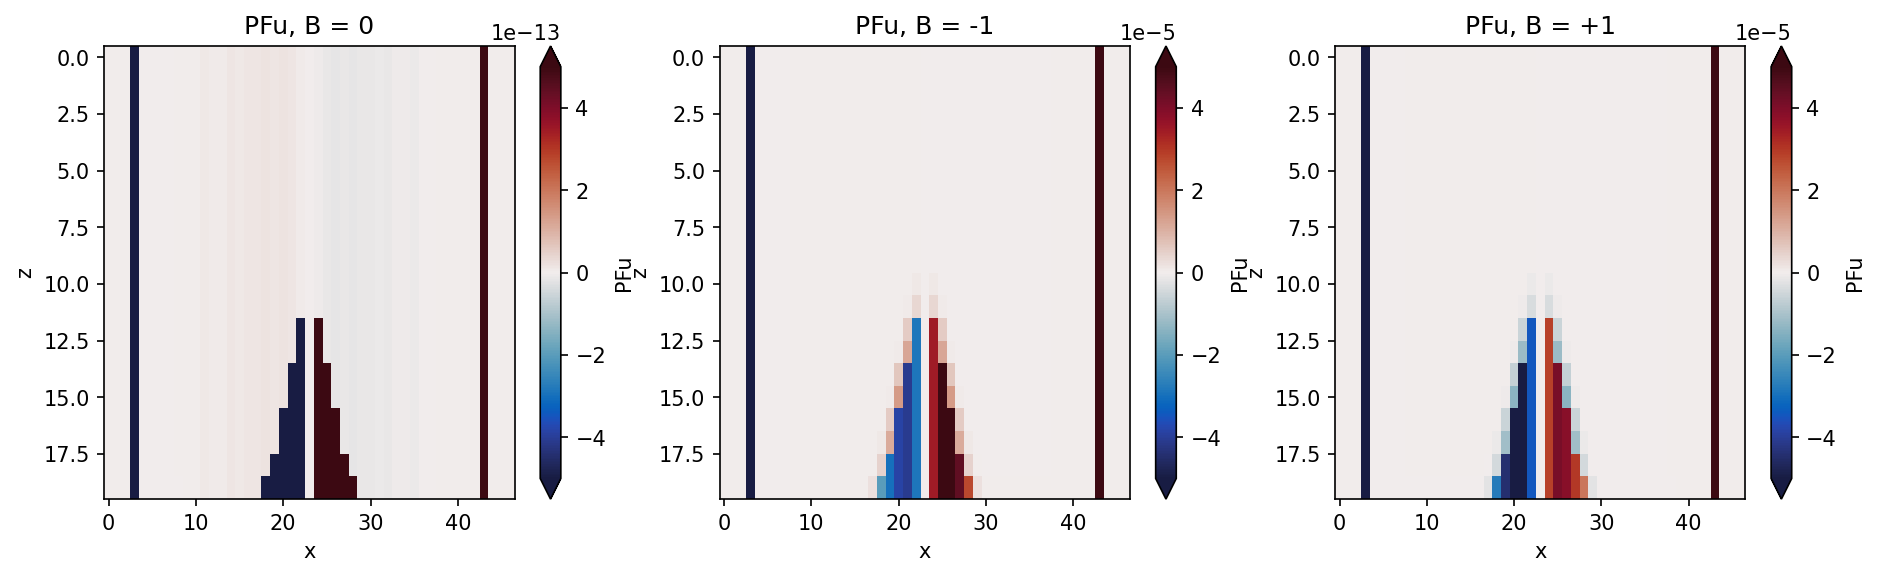

In [6]:
PFu0 = xr.open_dataset('PFuB0.nc')
PFum1 = xr.open_dataset('PFuB-1.nc')
PFup1 = xr.open_dataset('PFuB1.nc')
fig, axes = plt.subplots(ncols = 3, dpi = 150, figsize = (15,4))

PFu0.PFu.isel(y = 3).plot(ax = axes[0], vmin = -5e-13,vmax = 5e-13, cmap = cm.cm.balance, yincrease = False)
axes[0].set_title('PFu, B = 0')
PFum1.PFu.isel(y = 3).plot(ax = axes[1], vmin = -5e-5,vmax = 5e-5, cmap = cm.cm.balance, yincrease = False)
axes[1].set_title('PFu, B = -1')
PFup1.PFu.isel(y = 3).plot(ax = axes[2], vmin = -5e-5,vmax = 5e-5, cmap = cm.cm.balance, yincrease = False)
axes[2].set_title('PFu, B = +1')


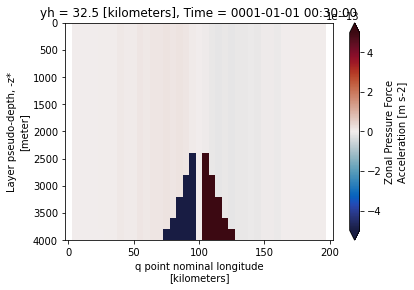

In [10]:
mom = xr.open_dataset('mom.nc')
mom.PFu.isel(Time = 1, yh = 0).plot(yincrease = False, vmin = -5e-13,vmax = 5e-13,cmap = cm.cm.balance)

In [12]:
S_t = xr.open_dataset('S_t.nc')
S_b = xr.open_dataset('S_b.nc')
prog = xr.open_dataset('prog.nc')

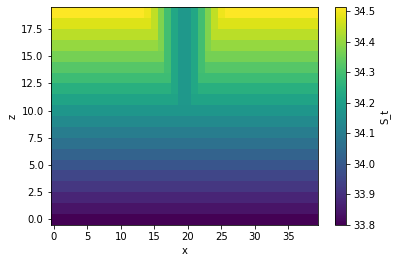

In [10]:
S_t.S_t.isel(y = 3,x=np.arange(3,43)).plot()
pred_depth = prog.e.isel(yh = 0, Time = 1)

In [19]:
pred_S_t = 33.8+0.75/4000*(-1)*prog.e.isel(yh = 0, Time = 1)[:-1,:]

after 30 mins

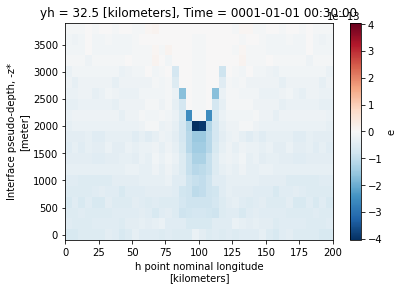

In [21]:
(pred_S_t - S_t.S_t.isel(y = 3,x=np.arange(3,43)).values).plot()

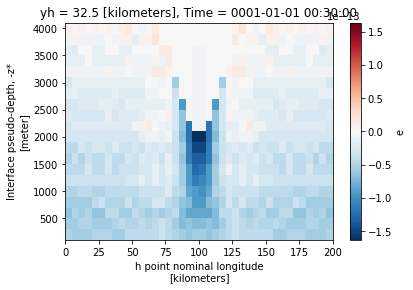

In [22]:
pred_S_b = 33.8+0.75/4000*(-1)*prog.e.isel(yh = 0, Time = 1)[1:,:]
(pred_S_b - S_b.S_b.isel(y = 3,x=np.arange(3,43)).values).plot()

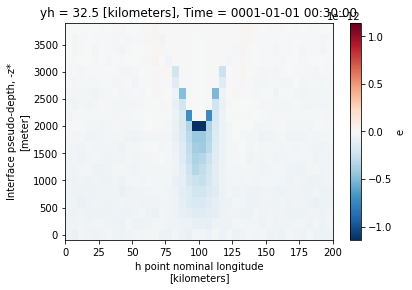

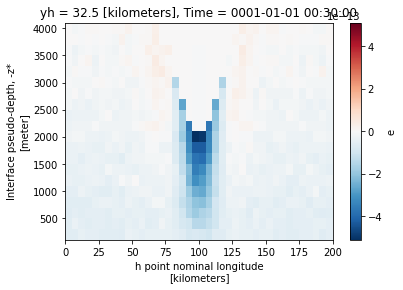

In [4]:
# after 60 mins

S_t = xr.open_dataset('S_t.nc')
S_b = xr.open_dataset('S_b.nc')
prog = xr.open_dataset('prog.nc')

pred_S_t = 33.8+0.75/4000*(-1)*prog.e.isel(yh = 0, Time = 1)[:-1,:]
(pred_S_t - S_t.S_t.isel(y = 3,x=np.arange(3,43)).values).plot()
plt.show()

pred_S_b = 33.8+0.75/4000*(-1)*prog.e.isel(yh = 0, Time = 1)[1:,:]
(pred_S_b - S_b.S_b.isel(y = 3,x=np.arange(3,43)).values).plot()


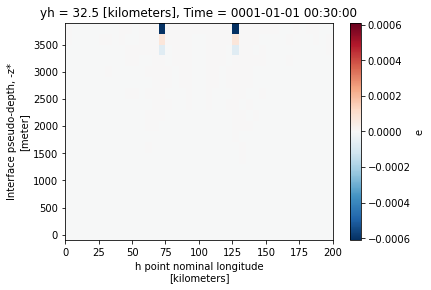

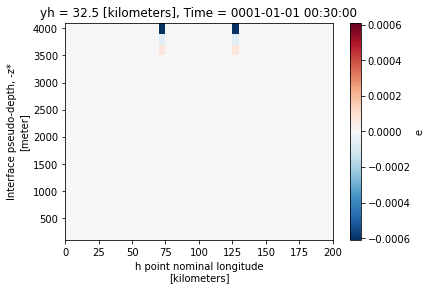

In [2]:
# after 75 mins

S_t = xr.open_dataset('S_t.nc')
S_b = xr.open_dataset('S_b.nc')
prog = xr.open_dataset('prog.nc')

pred_S_t = 33.8+0.75/4000*(-1)*prog.e.isel(yh = 0, Time = 1)[:-1,:]
(pred_S_t - S_t.S_t.isel(y = 3,x=np.arange(3,43)).values).plot()
plt.show()

pred_S_b = 33.8+0.75/4000*(-1)*prog.e.isel(yh = 0, Time = 1)[1:,:]
(pred_S_b - S_b.S_b.isel(y = 3,x=np.arange(3,43)).values).plot()


Text(0.5, 1.0, 'PFu, B = +1')

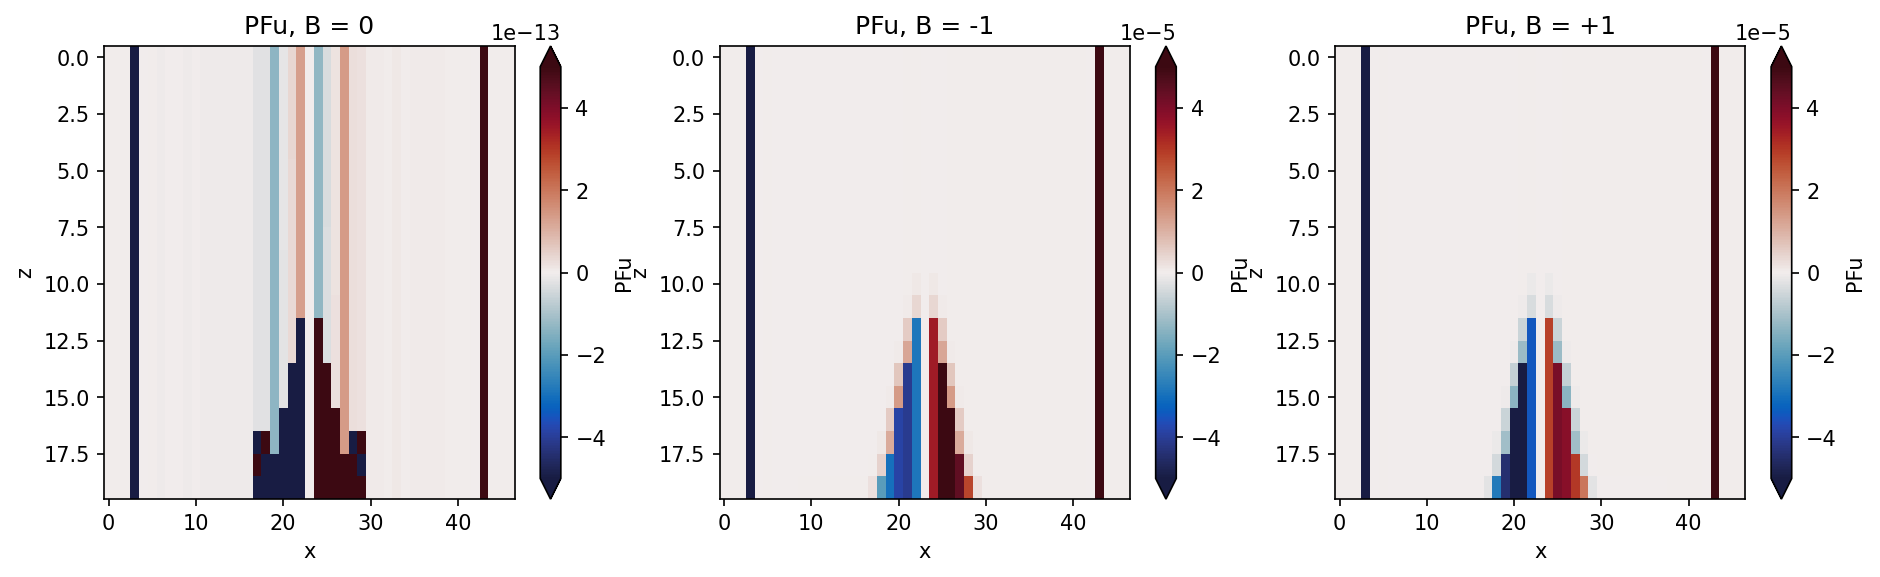

In [3]:
PFu0 = xr.open_dataset('PFuB0.nc')
PFum1 = xr.open_dataset('PFuB-1.nc')
PFup1 = xr.open_dataset('PFuB1.nc')
fig, axes = plt.subplots(ncols = 3, dpi = 150, figsize = (15,4))

PFu0.PFu.isel(y = 3).plot(ax = axes[0], vmin = -5e-13,vmax = 5e-13, cmap = cm.cm.balance, yincrease = False)
axes[0].set_title('PFu, B = 0')
PFum1.PFu.isel(y = 3).plot(ax = axes[1], vmin = -5e-5,vmax = 5e-5, cmap = cm.cm.balance, yincrease = False)
axes[1].set_title('PFu, B = -1')
PFup1.PFu.isel(y = 3).plot(ax = axes[2], vmin = -5e-5,vmax = 5e-5, cmap = cm.cm.balance, yincrease = False)
axes[2].set_title('PFu, B = +1')


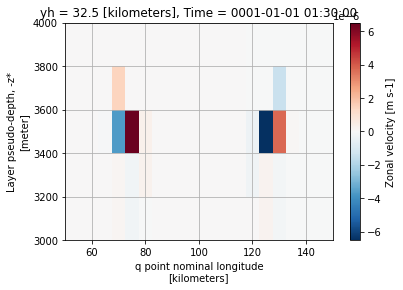

In [9]:
prog = xr.open_dataset('prog.nc')
prog.u.isel(yh = 0,Time = -1).plot(cmap = 'RdBu_r')
plt.ylim(3000,4000)
plt.xlim(50,150)
plt.grid()

(50.0, 150.0)

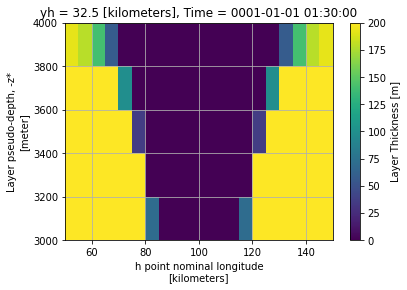

In [10]:
prog = xr.open_dataset('prog.nc')
prog.h.isel(yh = 0,Time = -1).plot()
plt.grid()
plt.ylim(3000,4000)
plt.xlim(50,150)

Check with PG solver

In [18]:
PFu0 = xr.open_dataset('PFuB0.nc')
PFu0.PFu.shape

(20, 8, 47)

In [19]:
S_t.S_t.shape

(20, 8, 46)

In [7]:
prog.e.shape

(6, 21, 2, 40)

In [15]:
S_t = xr.open_dataset('S_t.nc').S_t.values
S_b = xr.open_dataset('S_b.nc').S_b.values
prog = xr.open_dataset('prog.nc')
PFus = np.zeros([39,20])
PFus_mwipg = np.zeros([39,20])
for i in np.arange(39):
    for k in np.arange(20):
        S_tl = S_t[k,3,i+3]
        S_tr = S_t[k,3,i+4]
        S_bl = S_b[k,3,i+3]
        S_br = S_b[k,3,i+4]
        z_tl = -prog.e.isel(Time = -1,yh = 0).values[k,i]
        z_tr = -prog.e.isel(Time = -1,yh = 0).values[k,i+1]
        z_bl = -prog.e.isel(Time = -1,yh = 0).values[k+1,i]
        z_br = -prog.e.isel(Time = -1,yh = 0).values[k+1,i+1]
        
        PFus[i,k] = pg_given_rhos_mwipg_weak(z_tl, z_tr,z_bl,z_br, S_tl, S_tr,S_bl,S_br,R=1,mwipg = False, verbose = False,strat=0.75/4000,fiveptintxpa = True, 
                         B = 0,quadratictop = True,quadraticint = True)
        PFus_mwipg[i,k] = pg_given_rhos_mwipg_weak(z_tl, z_tr,z_bl,z_br, S_tl, S_tr,S_bl,S_br,mwipg = True, verbose = False,strat=0.75/4000,fiveptintxpa = True, 
                         B = 0,quadratictop = True,quadraticint = True)        



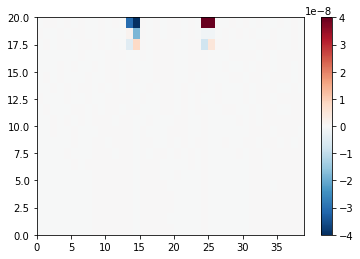

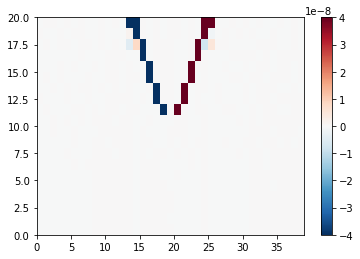

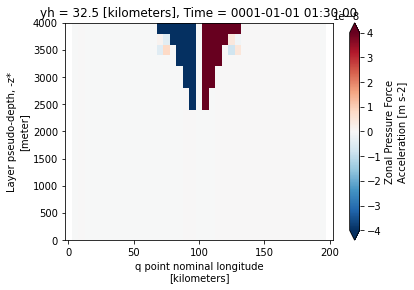

Text(0.5, 1.0, 'with MWIPG')

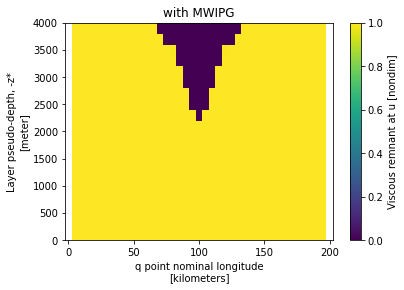

In [18]:
plt.pcolormesh(PFus.T, vmax = 4e-8,vmin = -4e-8,cmap = 'RdBu_r')
plt.colorbar()
plt.show()

plt.pcolormesh(PFus_mwipg.T, vmax = 4e-8,vmin = -4e-8,cmap = 'RdBu_r')
plt.colorbar()
plt.show()

mom = xr.open_dataset('mom.nc')
mom.PFu.isel(Time = -1, yh = 0).plot(vmax = 4e-8,vmin = -4e-8,cmap = 'RdBu_r')

plt.show()
visc = xr.open_dataset('visc.nc')
visc.visc_rem_u.isel(Time = -1, yh = 0).plot()
plt.title('with MWIPG')

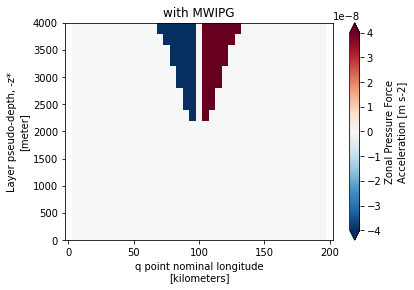

Text(0.5, 1.0, 'with MWIPG')

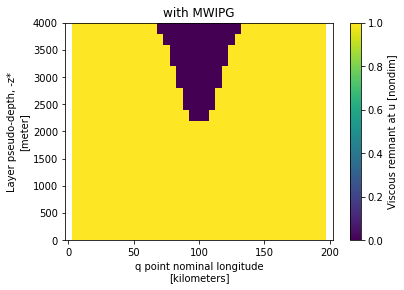

In [8]:
mom = xr.open_dataset('mom.nc')
mom.PFu.isel(Time = -1, yh = 0).plot(vmax = 4e-8,vmin = -4e-8,cmap = 'RdBu_r')
plt.title('with MWIPG')
plt.show()

visc = xr.open_dataset('visc.nc')
visc.visc_rem_u.isel(Time = -1, yh = 0).plot()
plt.title('with MWIPG')

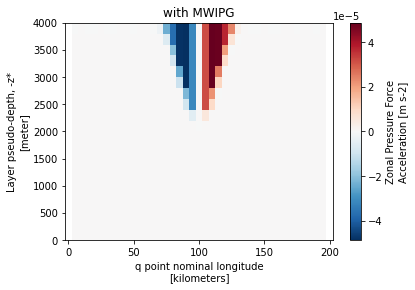

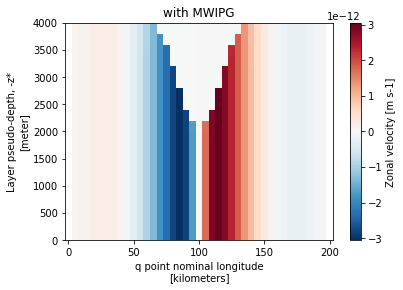

Text(0.5, 1.0, 'with MWIPG')

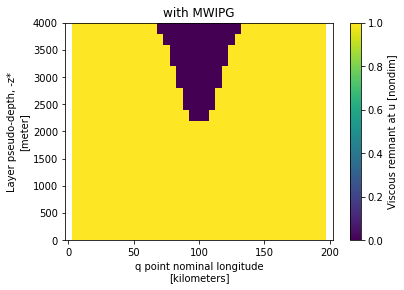

In [9]:
mom = xr.open_dataset('mom.nc')
mom.PFu.isel(Time = 0, yh = 0).plot(cmap = 'RdBu_r')
plt.title('with MWIPG')
plt.show()

prog = xr.open_dataset('prog.nc')
prog.u.isel(Time = 0, yh = 0).plot(cmap = 'RdBu_r')
plt.title('with MWIPG')
plt.show()

visc = xr.open_dataset('visc.nc')
visc.visc_rem_u.isel(Time = 0, yh = 0).plot()
plt.title('with MWIPG')

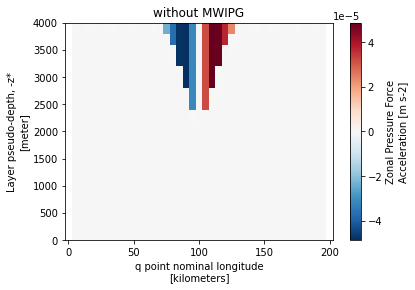

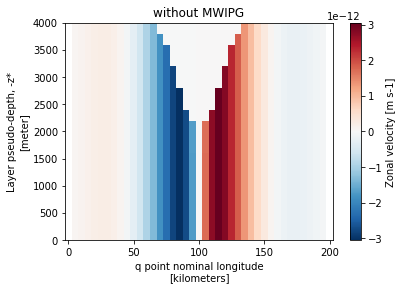

/Users/claireyung/opt/anaconda3/lib/python3.9/site-packages/xarray/coding/times.py:699: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)


Text(0.5, 1.0, 'without MWIPG')

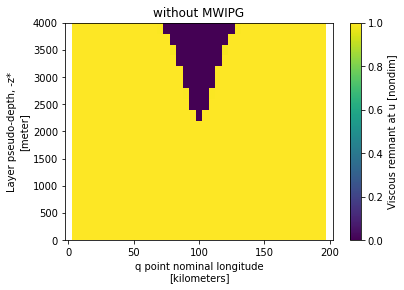

In [2]:
mom = xr.open_dataset('mom.nc')
mom.PFu.isel(Time = 0, yh = 0).plot(cmap = 'RdBu_r')
plt.title('without MWIPG')
plt.show()

prog = xr.open_dataset('prog.nc')
prog.u.isel(Time = 0, yh = 0).plot(cmap = 'RdBu_r')
plt.title('without MWIPG')
plt.show()

visc = xr.open_dataset('visc.nc')
visc.visc_rem_u.isel(Time = 0, yh = 0).plot()
plt.title('without MWIPG')

In [ ]:
plt.pcolormesh(PFus.T)

In [2]:
def pg_given_rhos_mwipg_weak(z_tl, z_tr,z_bl,z_br, S_tl, S_tr,S_bl,S_br,
                             R = 1, verbose = True, mwipg = False, strat = 0.02/1000,
                             rhoref = 1035,noise = 0,noise_br = 0, 
                             A = 0, B = 0,quadratictop = True, cubictop = False, monomialtop = False,
                             quadraticint = True, cubicint = False, monomialint = False,
                             fiveptintxpa = True, p_tl_noise= 0):
    rhotop = 1000+33.8*1
    rho_tl = S_tl+1000 #rhotop+z_tl*strat 
    rho_tr = S_tr+1000 #rhotop+z_tr*strat + noise
    rho_bl = S_bl+1000 #rhotop+z_bl*strat
    rho_br = S_br+1000 #rhotop+z_br*strat + noise_br

    if ((z_tl > z_bl) or (z_tr > z_br)):
        raise Exception("bottom depth shallower than top ")

    C1_90 = 1/90
    G_e = 9.8
    #rhoref = 1030.0
    rho0 = 1035
    GxRho = G_e * rho0
    z0pres = 0

    # 1. compute vertical integrals
    # first sample density in column by 5 points
    wt_t = 1-0.25*np.arange(5) #weighting for each pt for top density
    wt_b = 1-wt_t #weighting for each pt for bottom density

    r5l = wt_t * rho_tl + wt_b * rho_bl -rhoref
    r5r = wt_t* rho_tr + wt_b * rho_br -rhoref
    
    z5l = wt_t * z_tl + wt_b * z_bl
    z5r = wt_t* z_tr + wt_b * z_br
    
    dzl = z_bl - z_tl
    dzr = z_br - z_tr
    #print('r5l',r5l,'r5r',r5r)
    #print('r5l diff',np.diff(r5l),'r5r diff',np.diff(r5r))
    
    # do left
    rho_anoml = C1_90*(7.0*(r5l[0]+r5l[4]) + 32.0*(r5l[1]+r5l[3]) + 12.0*r5l[2]) 
    #print('rho_anoml',rho_anoml)
    dpal = G_e*dzl*rho_anoml
    # Use a Boole's-rule-like fifth-order accurate estimate of
    # the double integral of the pressure anomaly.
    intz_dpal = 0.5*G_e*dzl**2 * (rho_anoml - C1_90*(16.0*(r5l[3]-r5l[1]) + 7.0*(r5l[4]-r5l[0]))) 
    #print('intz_dpal',intz_dpal)

    # do right
    rho_anomr = C1_90*(7.0*(r5r[0]+r5r[4]) + 32.0*(r5r[1]+r5r[3]) + 12.0*r5r[2])
    dpar = G_e*dzr*rho_anomr
    # Use a Boole's-rule-like fifth-order accurate estimate of
    # the double integral of the pressure anomaly.
    intz_dpar = 0.5*G_e*dzr**2 * (rho_anomr - C1_90*(16.0*(r5r[3]-r5r[1]) + 7.0*(r5r[4]-r5r[0])))
    #print('intz_dpar',intz_dpar)
    #! 2. Compute horizontal integrals in the x direction
    hWght = 0
    #MWIPG goes here to change rho_tl,rho_tr,rho_bl,rho_br
    if mwipg:
        hWght = max(0., z_tl-z_br, z_tr-z_bl)
#        hWght = max(hWght,hWghtis)
#        print(hWght)
        if (hWght > 0.):
            dz_subroundoff = 1e-12
            hL = (dzl) + dz_subroundoff
            hR = (dzr) + dz_subroundoff
            hWght = hWght * ( (hL-hR)/(hL+hR) )**2
            iDenom = 1./( hWght*(hR + hL) + hL*hR )
            rho_tl = ( (hWght*hR)*rho_tr + (hWght*hL + hR*hL)*rho_tl) * iDenom
            rho_tr = ( (hWght*hL)*rho_tl + (hWght*hR + hR*hL)*rho_tr ) * iDenom
            rho_bl = ( (hWght*hR)*rho_br + (hWght*hL + hR*hL)*rho_bl ) * iDenom
            rho_br = ( (hWght*hL)*rho_bl + (hWght*hR + hR*hL)*rho_br ) * iDenom
    #print(rho_tl,rho_tr,rho_bl,rho_br)
    w_left = wt_t
    w_right = wt_b
    p15 = np.zeros(15)
    r15 = np.zeros(15)
    z15 = np.zeros(15)
    dz_x = np.zeros(5)    

    for m in np.arange(1,4):
        w_left = wt_t[m] ; w_right = wt_b[m]
        dz_x[m] = w_left*dzl + w_right*dzr

    #         ! Salinity and temperature points are linearly interpolated in
    #         ! the horizontal. The subscript (1) refers to the top value in
    #         ! the vertical profile while subscript (5) refers to the bottom
    #         ! value in the vertical profile.
        pos = (m-1)*5
#         r15[pos] = rho_tl + (rho_tr-rho_tl)*w_right**R#w_left*rho_tl + w_right*rho_tr
#         r15[pos+4] = rho_bl + (rho_br-rho_bl)*w_right**R#w_left*rho_bl + w_right*rho_br
        if quadraticint:
            #print('heyo')
            r15[pos] = rho_tl + (rho_tr-rho_tl)*w_right + (rho_tr-rho_tl)*B*w_right*(w_right-1) 
            if (r15[pos] > max(rho_tl,rho_tr)) or (r15[pos] < min(rho_tl,rho_tr)):
                raise Exception('rho out of bounds - choose another B')
            r15[pos+4] = rho_bl + (rho_br-rho_bl)*w_right+ (rho_br-rho_bl)*B*w_right*(w_right-1) 
            if (r15[pos+4] > max(rho_bl,rho_br)) or (r15[pos+4] < min(rho_bl,rho_br)):
                raise Exception('rho out of bounds - choose another B')
        elif cubicint:
            r15[pos] = rho_tl + (rho_tr-rho_tl)*w_right + (rho_tr-rho_tl)*A*w_right*(w_right-1)*(w_right-1/2) 
            if (r15[pos] > max(rho_tl,rho_tr)) or (r15[pos] < min(rho_tl,rho_tr)):
                raise Exception('rho out of bounds - choose another B')
            r15[pos+4] = rho_bl + (rho_br-rho_bl)*w_right+ (rho_br-rho_bl)*A*w_right*(w_right-1)*(w_right-1/2) 
            if (r15[pos+4] > max(rho_bl,rho_br)) or (r15[pos+4] < min(rho_bl,rho_br)):
                raise Exception('rho out of bounds - choose another A')
        elif monomialint:
            r15[pos] = rho_tl + (rho_tr-rho_tl)*w_right**R#w_left*rho_tl + w_right*rho_tr
            r15[pos+4] = rho_bl + (rho_br-rho_bl)*w_right**R#w_left*rho_bl + w_right*rho_br
        
        z15[pos] = w_left*z_tl + w_right*z_tr
        z15[pos+4] = w_left*z_bl + w_right*z_br
        #print(r15)

        p15[pos] = -GxRho*((w_left*z_tl + w_right*z_tr - z0pres))

    #    ! Pressure

        for n in np.arange(1,4):
            p15[pos+n] = p15[pos+n-1] + GxRho*0.25*dz_x[m]

    #    ! Salinity and temperature (linear interpolation in the vertical)
        for n in np.arange(1,4):
            r15[pos+n] = wt_t[n] * r15[pos] + wt_b[n] * r15[pos+4] 
            z15[pos+n] = wt_t[n] * z15[pos] + wt_b[n] * z15[pos+4]

    #print('r15', r15)
    r15 = r15-rhoref
    #print('r15', r15)
    #print('r15[4]-r15[]')
    intz = np.zeros(5)
    intz[0] = dpal ; intz[4] = dpar
    #      ! Use Boole's rule to estimate the pressure anomaly change.
    for m in np.arange(1,4):
        pos = (m-1)*5
        intz[m] = G_e*dz_x[m]*( C1_90*(7.0*(r15[pos]+r15[pos+4]) + 32.0*(r15[pos+1]+r15[pos+3]) +
                                12.0*r15[pos+2]))
    #print('intz',intz)
    #      ! Use Boole's rule to integrate the bottom pressure anomaly values in x.
    intx_dpa = C1_90*(7.0*(intz[0]+intz[4]) + 32.0*(intz[1]+intz[3]) +
                                 12.0*intz[2])



    dx = 5000
    I_Rho0 = 1/rho0
    pal = G_e*(rhotop*z_tl + strat*z_tl**2/2 - rhoref*z_tl) + p_tl_noise
    par = G_e*(rhotop*z_tr + strat*z_tr**2/2 - rhoref*z_tr)
    
    if verbose:
        print('pal', pal)
        print('par', par)
        print('Stl',    33.8+z_tl*0.75/4000)
        print('Str',    33.8+z_tr*0.75/4000)
        print('Sbl',    33.8+z_bl*0.75/4000)
        print('Sbr',    33.8+z_br*0.75/4000)

    #intx_pa = 0.5*(pal+par)
    #intx_pa = 0.5*(pal+par) - 9.8*strat/12*(z_tl**2+z_tr**2-2*z_tr*z_tl)
    rtop5 = np.zeros(5)
    rtop5[0]=rho_tl-rhoref
    rtop5[4]=rho_tr-rhoref
    z_x = np.zeros(5)
    z_x[0] = z_tl
    z_x[4] = z_tr
    ptop5 = np.zeros(5)
    ptop5[0] = pal
    ptop5[4] = par
    for pos in np.arange(1,4):
        w_left = wt_t[pos] ; w_right = wt_b[pos]
        if quadratictop:
            rtop5[pos] = rho_tl + (rho_tr-rho_tl)*w_right + (rho_tr-rho_tl)*B*w_right*(w_right-1)             
            if (rtop5[pos] > max(rho_tl,rho_tr)) or (rtop5[pos] < min(rho_tl,rho_tr)):
                raise Exception('rho out of bounds - choose another B')
        elif cubictop:
            rtop5[pos] = rho_tl + (rho_tr-rho_tl)*w_right + (rho_tr-rho_tl)*A*w_right*(w_right-1/2)*(w_right-1) 
            if (rtop5[pos] > max(rho_tl,rho_tr)) or (rtop5[pos] < min(rho_tl,rho_tr)):
                raise Exception('rho out of bounds - choose another A')
        elif monomialtop:
            rtop5[pos] = rho_tl + (rho_tr-rho_tl)*w_right**R
            
        rtop5[pos] = rtop5[pos]-rhoref
        z_x[pos] = z_tl + w_right*(z_tr-z_tl)
        #ptop5[pos] = G_e*rtop5[pos]*(z_x[pos]-z_tl)+pal ###probably the issue - not properly integrated
        #ptop5[pos] = G_e*(rhotop*z_x + strat*z_x**2/2 - rhoref*z_x) ## perfect (but doesnt use rtop5)
        #ptop5[pos] = G_e*(rtop5[pos]*(z_x[pos]-z_tl) - strat/2*(z_x[pos]-z_tl)**2)+pal ### uses both
        #ptop5[pos] = G_e*(rtop5[pos]*(z_x[pos]-z_tl) - (rtop5[pos]-rtop5[0])/2*(z_x[pos]-z_tl))+pal # just uses local, but still assumes hydrostatic balance
        ptop5[pos] = G_e*(rtop5[pos]+rtop5[pos-1])/2*(z_x[pos]-z_x[pos-1]) + ptop5[pos-1] #CUMULATIVELY calculated pressure at each point based on adjacent point
    #print(ptop5)
    #plt.plot(z_x,rtop5,marker = 'x')
    #ws = np.linspace(0,1,100)
    #if quadratictop:
        #plt.plot(z_tl +ws*(z_tr-z_tl), rho_tl + (rho_tr-rho_tl)*ws + (rho_tr-rho_tl)*B*ws*(ws-1)-rhoref )
    #elif cubictop:
        #plt.plot(z_tl +ws*(z_tr-z_tl), rho_tl + (rho_tr-rho_tl)*ws + (rho_tr-rho_tl)*A*ws*(ws-1/2)*(ws-1)-rhoref )        
    #elif monomialtop:
        #plt.plot(z_tl +ws*(z_tr-z_tl), rho_tl + (rho_tr-rho_tl)*ws**R-rhoref )        
    #plt.xlabel('z along top')
    #plt.ylabel('rho - rhoref along top')
    #plt.title('intxpa density distribution')
    #plt.show()
    #print(G_e*(rhotop*z_x + strat*z_x**2/2 - rhoref*z_x))
    if fiveptintxpa:
        intx_pa = C1_90*(7.0*(ptop5[0]+ptop5[4]) + 32.0*(ptop5[1]+ptop5[3]) + 12.0*ptop5[2]) 
    else:
        intx_pa = 0.5*(pal+par) - 9.8*strat/12*(z_tl**2+z_tr**2-2*z_tr*z_tl)
    #print(intx_pa)
    #print(0.5*(pal+par) - G_e*strat/12*(z_tl-z_tr)**2)
    #print(0.5*(pal+par))# - G_e*strat/12*(z_tl-z_tr)**2)
    h_neglect = 1e-20

#     PFu = (((pal*dzl + intz_dpal) - (par*dzr + intz_dpar)) + \
#           ((dzr-dzl) * intx_pa - (z_br-z_bl) * intx_dpa)) * \
#           ((2.0*I_Rho0*(1/dx)) / ((dzl+dzr) + h_neglect))

    PFu = (((pal*dzl + intz_dpal) - (par*dzr + intz_dpar)) + \
          ((dzr-dzl) * intx_pa + (z_br-z_bl) * intx_dpa)) * \
          ((2.0*I_Rho0*(1/dx)) / ((dzl+dzr) + h_neglect))
    #print('Numerator',(((pal*dzl + intz_dpal) - (par*dzr + intz_dpar)) + \
   #       ((dzr-dzl) * intx_pa - (z_br-z_bl) * intx_dpa)))
    if verbose:
        print('intz_dpal',intz_dpal)
        print('intz_dpar',intz_dpar)
        print('intx_dpa',intx_dpa)
        print('(dzr-dzl)',(dzr-dzl))
        print('(z_br-z_bl)',(z_br-z_bl))

        print('term1',(pal*dzl + intz_dpal) - (par*dzr + intz_dpar))
        print('term2',((dzr-dzl) * intx_pa + (z_br-z_bl) * intx_dpa))
        print('term3',((2.0*I_Rho0*(1/dx)) / ((dzl+dzr) + h_neglect)))
        print('hl',dzl)
        print('hr',dzr)
        print('deltadpa',(pal*dzl) - (par*dzr))
        print('deltaintz',intz_dpal-intz_dpar)
#     print('Numerator',(((pal*dzl + intz_dpal) - (par*dzr + intz_dpar)) + \
#           ((dzr-dzl) * intx_pa - (z_br-z_bl) * intx_dpa)))
    
#     print(PFu,((pal*dzl + intz_dpal) - (par*dzr + intz_dpar))* ((2.0*I_Rho0*(1/dx)) / ((dzl+dzr) + h_neglect)),
#          ((dzr-dzl) * intx_pa - (z_br-z_bl) * intx_dpa) * \
#           ((2.0*I_Rho0*(1/dx)) / ((dzl+dzr) + h_neglect)))
#     print(((pal*dzl + intz_dpal) )* ((2.0*I_Rho0*(1/dx)) / ((dzl+dzr) + h_neglect)))
#     print(((- (par*dzr + intz_dpar))* ((2.0*I_Rho0*(1/dx)) / ((dzl+dzr) + h_neglect))))
    if verbose:
        print('PFu= '+str(PFu))
#        print('intx_dpa term',((z_br-z_bl) * intx_dpa)*((2.0*I_Rho0*(1/dx)) / ((dzl+dzr) + h_neglect)),)
#        print('intx_pa term',(dzr-dzl) * intx_pa *((2.0*I_Rho0*(1/dx)) / ((dzl+dzr) + h_neglect)),)
#        print('z term',((pal*dzl + intz_dpal) - (par*dzr + intz_dpar))*((2.0*I_Rho0*(1/dx)) / ((dzl+dzr) + h_neglect)))
#        print('intz term',((intz_dpal) - ( intz_dpar))*((2.0*I_Rho0*(1/dx)) / ((dzl+dzr) + h_neglect)))
        
        # Plot density profile

        fig = plt.figure(figsize = (8,6))
        zsl = z_tl + (dzl)*np.arange(5)*0.25
        xsl = np.zeros(5)
        zsr = z_tr + (dzr)*np.arange(5)*0.25
        xsr = np.zeros(5)+1000
        x15 = [250,250,250,250,250,500,500,500,500,500,750,750,750,750,750]
        plt.scatter([xsl,xsr],[zsl,zsr], c = [r5l+rhoref,r5r+rhoref],edgecolors= "black",s = 300, vmin = rhotop+strat*min(z_tr,z_tl), vmax = rhotop+strat*max(z_br,z_bl))
        plt.scatter(x15,z15,c = r15+rhoref,edgecolors= "black",s = 300,  vmin = rhotop+strat*min(z_tr,z_tl), vmax = rhotop+strat*max(z_br,z_bl))
        plt.colorbar(label = 'Density')
        plt.plot([xsr[0],xsr[0],xsl[0],xsl[0],xsr[0]],[zsr[0],zsr[4],zsl[4],zsl[0],zsr[0]],color = 'gray')
        plt.ylim(max(z_bl,z_br)+50,min(z_tl,z_tr)-50)
        plt.ylabel('z (m)')
        plt.xlabel('x (m)')
        if hWght > 0:
            plt.title('z_tl = '+str(z_tl)+', z_tr = ,'+str(z_tr)+', \n z_bl = '+str(z_bl)+', z_br = '+str(z_br)+', \n R = '+str(R)+', MWIPG = True')
        else:
            plt.title('z_tl = '+str(z_tl)+', z_tr = ,'+str(z_tr)+', \n z_bl = '+str(z_bl)+', z_br = '+str(z_br)+', \n R = '+str(R)+', MWIPG = False')
        plt.show()
    return PFu#, r15, z15, r5l, z5l, r5r, z5r,rho_tr,rho_tl,rho_br,rho_bl
            


# compare visc rem u in mwipg and not ice shelves

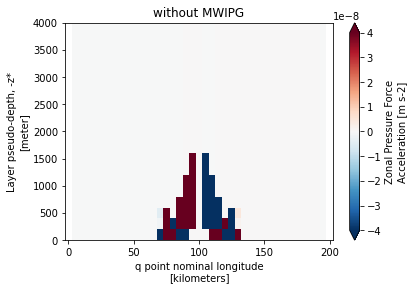

Text(0.5, 1.0, 'without MWIPG')

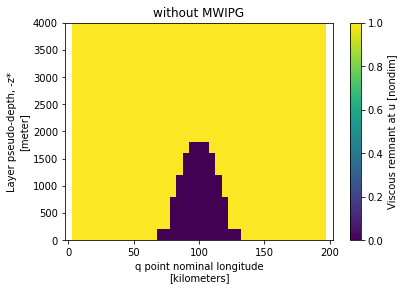

In [3]:
mom = xr.open_dataset('mom.nc')
mom.PFu.isel(Time = -1, yh = 0).plot(vmax = 4e-8,vmin = -4e-8,cmap = 'RdBu_r')
plt.title('without MWIPG')
plt.show()
visc = xr.open_dataset('visc.nc')
visc.visc_rem_u.isel(Time = -1, yh = 0).plot()
plt.title('without MWIPG')

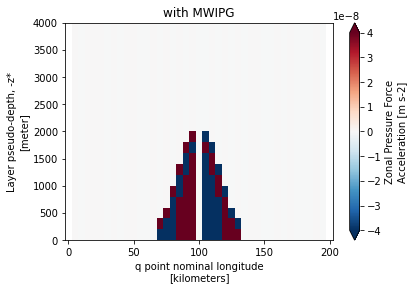

Text(0.5, 1.0, 'with MWIPG')

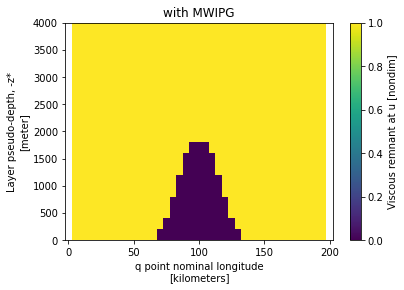

In [3]:
mom = xr.open_dataset('mom.nc')
mom.PFu.isel(Time = 0, yh = 0).plot(vmax = 4e-8,vmin = -4e-8,cmap = 'RdBu_r')
plt.title('with MWIPG')
plt.show()
visc = xr.open_dataset('visc.nc')
visc.visc_rem_u.isel(Time = 0, yh = 0).plot()
plt.title('with MWIPG')